In [175]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

In [176]:
def load_datasets(filename):
    '''
    Читає вхідний файл
    
    Параметри:
    filename - шлях до вхідного файлу з даними
    
    Результат:
    X - набір характеристик
    y - набір передбачуваних величин
    '''
    
    df = pd.read_csv(filename, delimiter=',')
    X, y = df["A"], df["B"]
    return X, y

In [177]:
def split_datasets(X, y, test_size = 0.2):
    '''
    Розбиває дані на 2 датасети: тренувальний та тестувальний.
    
    Параметри:
    X - набір характеристик
    y - набір передбачуваних величин
    test_size - розмір тестового датасету
    
    Результат:
    X_train - набір тренувальних прикладів
    X_test - набір тестових прикладів
    y_train - вектор величин, що передбачаємо для тренувального датасету
    y_test - вектор величин, що передбачаємо для тестового датасету
    '''
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    return X_train, X_test, y_train, y_test

In [178]:
def plot_data(X_train, X_test, y_train, y_test):
    '''
    Функція для відображення розподілу тренувальних та тестових даних (для однієї змінної)
    '''
    plt.scatter(X_train, y_train, marker='^', c='green')
    plt.scatter(X_test, y_test, marker='o', c='red')
    plt.show()

In [179]:
def normalize(X):
    '''
    Нормалізує датасет з характеристиками
    
    Параметри:
    X - набір характеристик
    
    Результат:
    X - набір нормалізованих характеристик
    mean - вектор середніх значень характеристик
    std - вектор стандартних девіацій характеристик
    '''
    ##################
    # Заповнити змінні
    ##################
    X_new=[]
    mean = np.mean(X)
    std = np.std(X)
    for i in X:
        X_new.append((i-mean)/std)
    
    print(X_new)
    return X_new, mean, std

In [180]:
def prepare_X(X):
    '''
    Формує датасет з рисами, де першою колонкою буде колонка з одиницями.
    
    Параметри:
    X - вхідний датасет з прикладами, по одному в рядок. Кожна риса - відповідна колонка.
    
    Результат:
    X_new - датасет, який складається з колонки одиниць, а решта колонок з X    
    '''
    m = np.array(X).shape[0]
    ones = np.ones((m, 1))
    X_new = np.array(X[:])
    X_new = np.column_stack((ones, X_new))
    return X_new

In [217]:
def hypothesis(X, theta):
    '''
    Обчислює значення передбачуваної величини для вхідної матриці X та вектора параметрів thetha.
    
    Параметри:
    X - матриця з рисами. Перша колонка - одиниці. Друга - дані риси.
    thetha - вектор параметрів: [thetha0, thetha1]
    
    Результат:
    Матриця значень шуканої величини для прикладів з X
    '''
    ######################
    h_thetha=[]
    # Один рядок коду
    for i in X:
        h_thetha.append(theta[0]+float(theta[1]*i[1])
    ######################
    return h_thetha

In [182]:
def cost_function(X, y, theta):
    '''
    Функція для обчислення штрафної функції J.
    
    Параметри:
    X - тренувальний датасет. 0 - колонка з одиниць, далі - реальні риси
    y - точні значення передбачуваної величини
    thethe - вектор параметрів регресії
    
    Результат:
    Дійсне число - значення штрафної функції для набору прикладів X та параметрів thetha
    '''
    m = X.shape[0]
    if m == 0:
        return None
    ######################
    # 1-2 рядки коду
    H=hypothesis(X,theta)
    J=0
    for i in range(len(H)):
        J=J+(H[i]-y[i])**2
    ######################
    return J/(2*len(H))

In [183]:
def derivative(X, y, theta,temp):
    m = X.shape[0]
    if m == 0:
        return None
    '''
    Функція для обчислення похідних штрафної функції J по thetha.
    
    Параметри:
    X - тренувальний датасет. 0 - колонка з одиниць, далі - реальні риси
    y - точні значення передбачуваної величини
    thetha - вектор параметрів регресії
    
    Результат:
    Вектор похідних d_thetha
    '''
    ######################
    # 1 рядок коду
    CF=hypothesis(X,theta)
    d_thetha=0
    arr=[]
    if temp:
        for i in X:
            arr.append(i[1])
    else:
        arr=np.ones(len(X))
        
    for i in range(len(X)):
        d_thetha+=((CF[i]-y[i])*arr[i])
    ######################
    return d_thetha/(len(y))

In [184]:
def gradient_descent(X, y, theta, alpha, num_iters, print_J = True):
    '''
    Функція, що реалізує градієнтний спуск для метода лінійної регресії.
    
    Параметри:
    X - тренувальний датасет. 0 - колонка з одиниць, далі - реальні риси
    y - точні значення передбачуваної величини
    thetha - вектор початкових параметрів регресії
    alpha - швидкість навчання
    num_iters - кількість ітерацій
    print_J - виведення штрафної функції на екран після кожної ітерації
    
    Результат:
    theta - оптимальні значення параметрів регресії
    J_history - масив історичних значень штрафної функції після кожної ітерації
    '''
    m = X.shape[0]
    J_history = []
    J = cost_function(X, y, theta)
    if print_J == True:
        print(J)
    J_history.append(J)
    for i in range(num_iters):
        ######################
        # Використати написані вище функції
        delta = [derivative(X, np.array(y), theta,0),derivative(X, np.array(y), theta,1)]
        print('D - ',delta)
#         
        theta = [theta[0]-alpha*delta[0],theta[1]-alpha*delta[1]]
        J = cost_function(X, y, theta)
        ######################
        if print_J == True:
            print(J)
        J_history.append(J)
    return theta, J_history

In [185]:
def plot_J(X, y):
    '''
    Функція для виведення графіків штрафної функції для різних значень параметрів на вхідних даних
    
    Параметри:
    X - тренувальний датасет. 0 - колонка з одиниць, далі - реальні риси
    y - точні значення передбачуваної величини
    '''
    theta_0 = np.linspace(-10, 10, 100)
    theta_1 = np.linspace(-1, 4, 100)
    
    J_vals = np.zeros((len(theta_0), len(theta_1)))
    for i, t0 in enumerate(theta_0):
        for j, t1 in enumerate(theta_1):
            theta = np.array([t0, t1])
            J_vals[i, j] = cost_function(X, y, theta)
    
    J_vals = J_vals.T
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(theta_0, theta_1, J_vals, color='b')
    plt.xlabel('theta_0')
    plt.ylabel('theta_1')
    plt.title('Surface plot of the cost function')
    plt.show()
    plt.contour(theta_0, theta_1, J_vals, np.logspace(-2, 3, 20))
    plt.xlabel('theta_0')
    plt.ylabel('theta_1')
    plt.title('Contour plot of the cost function')
    plt.show()

## Основний код програми

Отримання датасетів та видрук їх параметрів.

In [186]:
X, y = load_datasets('burrito.csv')
print('Dataset: X={}, y={}'.format(X.shape, y.shape))

Dataset: X=(97,), y=(97,)


Розбиття датасету на частини:

In [187]:
X_train, X_test, y_train, y_test = split_datasets(X, y, 0.2)
print('Training set: X={}, y={}'.format(X_train.shape, y_train.shape))
print('Test set: X={}, y={}'.format(X_test.shape, y_test.shape))

Training set: X=(77,), y=(77,)
Test set: X=(20,), y=(20,)


Відображення тренувальних і тестових даних на графіку (для 1 змінної)

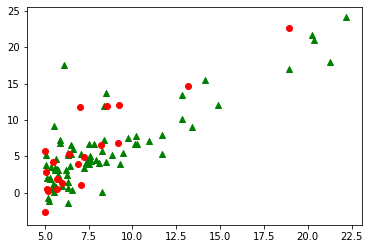

In [188]:
plot_data(X_train, X_test, y_train, y_test)

Підготовка тренувальних даних (додавання 0-колонки з одиницями). Ініціалізація параметрів регресії (0, 0): 

In [189]:
X_train_norm, mean, std = normalize(X_train)
X = prepare_X(X_train_norm)
theta = np.array([0, 0])

[-0.12672894506043766, -0.7284472915860143, -0.18257147190107237, 0.013935759282713527, -0.7074055452358652, -0.613813873446101, -0.7126974814436873, -0.4974920756589304, -0.6535789940934483, -0.45654256928887993, 1.2767177369501552, 2.6790808320229558, -0.5388951765610798, -0.6191310093501505, 0.04813174706373401, -0.742937116916955, -0.7615848921254704, -0.685759006176251, -0.6594505233145078, -0.47828990713340525, 0.8518508585507406, -0.09933687526090251, -0.46402687906851375, -0.49691248264569277, 0.45571163385093083, -0.8114046915676791, -0.702063209635588, -0.31670945492124347, -0.5174502350712871, -0.008189574005227428, 1.4707553979036248, 3.027340633890091, -0.2502578559687371, -0.19882527596795405, 0.6626011398805389, -0.22772932754115266, 3.2637137845061357, -0.17412957366478526, -0.19842208082831053, -0.7610052991122328, -0.8247857302646003, -0.7933617090686295, -0.5026832130818414, -0.7749407311261637, 0.8498348828525225, 1.134087456301241, -0.05838736889085205, -0.44847866

Для спрощення записів аліас для вектора передбачуваних значень

In [190]:
y = y_train[:]


У випадку використання ВСІХ даних для тренування (test_size=0.0), штрафна функція має повернути величину близьку до 32.072.

In [191]:
print('X: {}'.format(X.shape))
print('y: {}'.format(y.shape))
print(cost_function(X, np.array(y), theta))


X: (77, 2)
y: (77,)
31.38411922154871


Налаштування гіперпараметрів регресії: швидкості навчання та кількості ітерацій.

In [192]:
alpha = 0.01
num_iters = 1500

Запуск градієнтного спуску та видрук знайдених оптимальних значень на екран. У випадку використання всіх даних для тренування, результати будуть близькі до Theta 0: -3.63; Theta 1: 1.17

In [193]:
new_theta, Js = gradient_descent(X, np.array(y), theta, alpha, num_iters, False)
# print('Theta 0: {}; Theta 1: {}'.format(new_theta[0], new_theta[1]))

D -  [-5.845668701298699, -4.48543467725905]
D -  [-5.787212014285714, -4.440580330486458]
D -  [-5.729339894142859, -4.396174527181595]
D -  [-5.672046495201429, -4.352212781909777]
D -  [-5.615326030249414, -4.3086906540906815]
D -  [-5.5591727699469216, -4.265603747549771]
D -  [-5.503581042247453, -4.222947710074275]
D -  [-5.448545231824975, -4.18071823297353]
D -  [-5.394059779506728, -4.138911050643795]
D -  [-5.340119181711659, -4.0975219401373595]
D -  [-5.286717989894544, -4.0565467207359855]
D -  [-5.233850809995596, -4.015981253528627]
D -  [-5.1815123018956415, -3.9758214409933386]
D -  [-5.129697178876685, -3.936063226583404]
D -  [-5.078400207087917, -3.89670259431757]
D -  [-5.027616205017038, -3.857735568374396]
D -  [-4.97734004296687, -3.8191582126906503]
D -  [-4.9275666425372, -3.780966630563746]
D -  [-4.878290976111826, -3.7431569642581053]
D -  [-4.82950806635071, -3.705725394615527]
D -  [-4.781212985687204, -3.6686681406693693]
D -  [-4.733400855830331, -3.631

Відображення штрафної функції як функції від thetha0, thetha1.

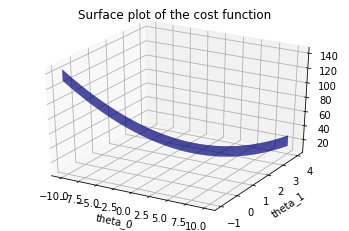

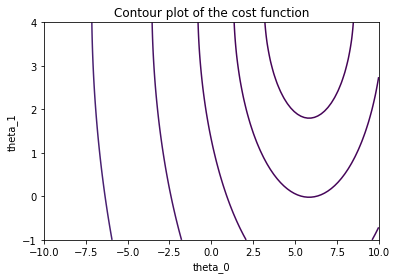

In [194]:
plot_J(X, np.array(y))

Відображення знайденої апроксимації разом із тренувальними даними.

[5.845667043139999, 4.485433404938815]


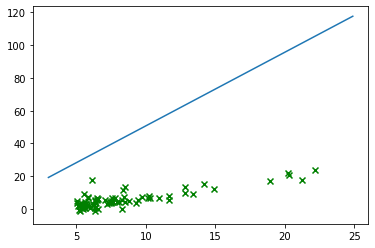

In [195]:
x = np.arange(3, 25, 0.1)
print(new_theta)

h = new_theta[0] + new_theta[1]*x
plt.plot(x, h)
plt.scatter(X_train, y_train, marker='x', c='green')

plt.show()

Оцінка похибки апроксимації на тестових даних (test_size має бути більше 0.0 та менше 1.0).

In [218]:
####################
# Нормалізувати тестовий датасет, використовуючи mean, std з тренувального
####################
X_test_proc = normalize(X)
X_test_proc = prepare_X(X_test_proc)
y_test_pred = hypothesis(X_test_proc, new_theta)
rel_diff = np.abs(np.divide(y_test - y_test_pred, y_test)) * 100

res = pd.DataFrame({'X' : X_test, 'y_actual' : y_test, 'y_pred' : y_test_pred, 'err' : rel_diff})
print(res)
print(cost_function(X_test_proc, y_test, new_theta))

[array([ 0.57735027, -0.72368425]), array([ 0.57735027, -1.41848875]), array([ 0.57735027, -0.78816565]), array([ 0.57735027, -0.56125864]), array([ 0.57735027, -1.39419183]), array([ 0.57735027, -1.28612148]), array([ 0.57735027, -1.40030243]), array([ 0.57735027, -1.15180464]), array([ 0.57735027, -1.33203829]), array([ 0.57735027, -1.10452022]), array([0.57735027, 0.89687639]), array([0.57735027, 2.51618581]), array([ 0.57735027, -1.19961282]), array([ 0.57735027, -1.29226118]), array([ 0.57735027, -0.52177251]), array([ 0.57735027, -1.43522016]), array([ 0.57735027, -1.45675275]), array([ 0.57735027, -1.36919656]), array([ 0.57735027, -1.33881814]), array([ 0.57735027, -1.12963188]), array([0.57735027, 0.40628238]), array([ 0.57735027, -0.69205461]), array([ 0.57735027, -1.11316236]), array([ 0.57735027, -1.15113538]), array([ 0.57735027, -0.0511398 ]), array([ 0.57735027, -1.5142797 ]), array([ 0.57735027, -1.38802304]), array([ 0.57735027, -0.94305485]), array([ 0.57735027, -1.17

TypeError: can't multiply sequence by non-int of type 'float'

In [206]:
x_=np.array([[1,1],[1,2],[1,3],[1,4],[1,5]])

In [207]:
y_=np.array([1,4,9,16,25])
print(derivative(x_,y_,np.array([0,0]),0))

1
2
3
4
5
-11.0
